In [1]:
import pandas as pd
import os

In [2]:
files= os.listdir("Sales_Data")
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
df= pd.DataFrame()

In [4]:
for file in files:
    if not file.endswith(".csv"):
        continue
    new_df=pd.read_csv(f"Sales_Data/{file}")
    df=pd.concat([df,new_df])

In [5]:
df.to_csv("all_data.csv")

# Read From The Updated Dataset

In [6]:
df= pd.read_csv("all_data.csv",index_col=0)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [8]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


# Adding New Column

In [9]:
df['Month']= df['Order Date'].str[:2]
df['Month']

0         04
1        NaN
2         04
3         04
4         04
        ... 
11681     09
11682     09
11683     09
11684     09
11685     09
Name: Month, Length: 186850, dtype: object

In [10]:
nan_rows = df.isnull().sum()
nan_rows

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64

In [24]:
df.dropna(inplace=True)
df=df[df.Month != "Or"]

In [25]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [26]:
df.Month.astype("int32")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [27]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered']).copy()
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [28]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [29]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


# Q1: What was the best month for sales and how much money was earned ?

In [30]:
best_month_data = df.groupby('Month')[['Sales','Quantity Ordered']].sum()
best_month_data

,Sales,Quantity Ordered
Month,,
01,1822256.73,10903
02,2202022.42,13449
03,2807100.38,17005
04,3390670.24,20558
05,3152606.75,18667
06,2577802.26,15253
07,2647775.76,16072
08,2244467.88,13448
09,2097560.13,13109


In [31]:
best_month = best_month_data['Sales'].idxmax()
most_sales = best_month_data.Sales.max()

In [32]:
print(f"Best Month was {best_month} with {most_sales} sales")

Best Month was 12 with 4613443.34 sales


# Plot 1

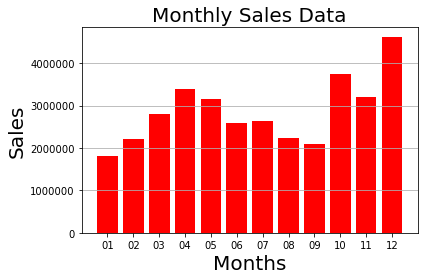

In [34]:
import matplotlib.pylab as plt
plt.bar(best_month_data.index,best_month_data['Sales'],color='red')
plt.xlabel("Months",fontsize=20)
plt.ylabel("Sales",fontsize=20)
plt.title("Monthly Sales Data",fontsize=20,)
plt.grid(axis='y')
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.tight_layout()
plt.show()

# Q2: Which city has the highest number of sales ?

In [35]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99


In [36]:
split_address = df['Purchase Address'].str.split(",")

In [37]:
df['City']= split_address.str[1]

In [38]:
city_sales= df.groupby('City')['Sales'].sum()
best_city= city_sales.idxmax()
m_sales_c= city_sales.max()
city_sales

City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64

In [39]:
print(f"The best city is{best_city} with {m_sales_c} sales")

The best city is San Francisco with 8262203.91 sales


# Plot 2

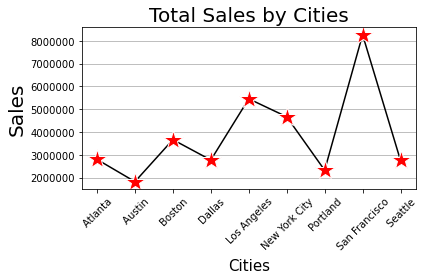

In [41]:
plt.plot(city_sales.index,city_sales.values,color="black",marker="*",ms=20,mec='white',mfc='red')
plt.xlabel("Cities",fontsize=15)
plt.ylabel("Sales",fontsize=20)
plt.title("Total Sales by Cities",fontsize=20)
plt.xticks(city_sales.index,rotation=45)
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Q3:What is the best time for advertisement ?

In [42]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%m/%d/%y %H:%M")
df['Time'] = df['Order Date'].dt.time
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,22:30:00
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,14:38:00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,14:38:00
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,09:27:00


In [43]:
time_sale = df.groupby(df['Time'].apply(lambda x: x.hour))['Sales'].sum()
time_sale.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='Time')

# plot 3

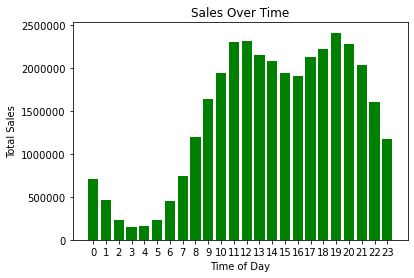

In [45]:
plt.bar(time_sale.index, time_sale,color="green")
plt.title("Sales Over Time")
plt.xlabel("Time of Day")
plt.ylabel("Total Sales")
plt.xticks(range(0,24))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

# Q4: What product are sold the most ?

In [46]:
product_data = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)[:10]

# Plot 4

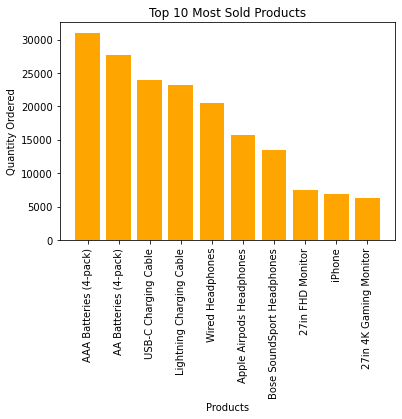

In [47]:
plt.bar(product_data.index , product_data,color='orange')
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation="vertical")
plt.title("Top 10 Most Sold Products")
plt.show()

# Q5: Show Frequently bought together products ?

In [48]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,22:30:00
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,14:38:00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,14:38:00
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,09:27:00


In [49]:
order_id_group = df.groupby('Order ID')['Product'].agg(list)
order_id_group

Order ID
141234                        [iPhone]
141235      [Lightning Charging Cable]
141236              [Wired Headphones]
141237              [27in FHD Monitor]
141238              [Wired Headphones]
                      ...             
319666      [Lightning Charging Cable]
319667         [AA Batteries (4-pack)]
319668               [Vareebadd Phone]
319669              [Wired Headphones]
319670    [Bose SoundSport Headphones]
Name: Product, Length: 178437, dtype: object

In [50]:
def relation(product):
    counter = {}
    for order in order_id_group:
        if product in order:
            for item in order:
                if item != product:
                    counter[item] = counter.get(item , 0) + 1
    return counter
freq_bought = {}
for product in df['Product'].unique():
    connections = relation(product)
    freq_bought[product] = connections

freq_bought

{'USB-C Charging Cable': {'Wired Headphones': 204,
  'Google Phone': 997,
  'Apple Airpods Headphones': 63,
  'Vareebadd Phone': 368,
  'AA Batteries (4-pack)': 75,
  'Lightning Charging Cable': 100,
  '20in Monitor': 25,
  'AAA Batteries (4-pack)': 95,
  '27in FHD Monitor': 43,
  'Flatscreen TV': 17,
  'iPhone': 29,
  'Bose SoundSport Headphones': 102,
  '27in 4K Gaming Monitor': 23,
  '34in Ultrawide Monitor': 26,
  'ThinkPad Laptop': 20,
  'Macbook Pro Laptop': 21,
  'LG Dryer': 1},
 'Bose SoundSport Headphones': {'Google Phone': 228,
  '27in FHD Monitor': 26,
  'Lightning Charging Cable': 72,
  '20in Monitor': 15,
  'Wired Headphones': 74,
  'Vareebadd Phone': 82,
  'Macbook Pro Laptop': 15,
  'Apple Airpods Headphones': 50,
  'AA Batteries (4-pack)': 55,
  'LG Washing Machine': 2,
  'USB-C Charging Cable': 102,
  'AAA Batteries (4-pack)': 57,
  '27in 4K Gaming Monitor': 19,
  'Flatscreen TV': 13,
  'ThinkPad Laptop': 13,
  '34in Ultrawide Monitor': 17,
  'iPhone': 12},
 'Google Ph

# Plot 5

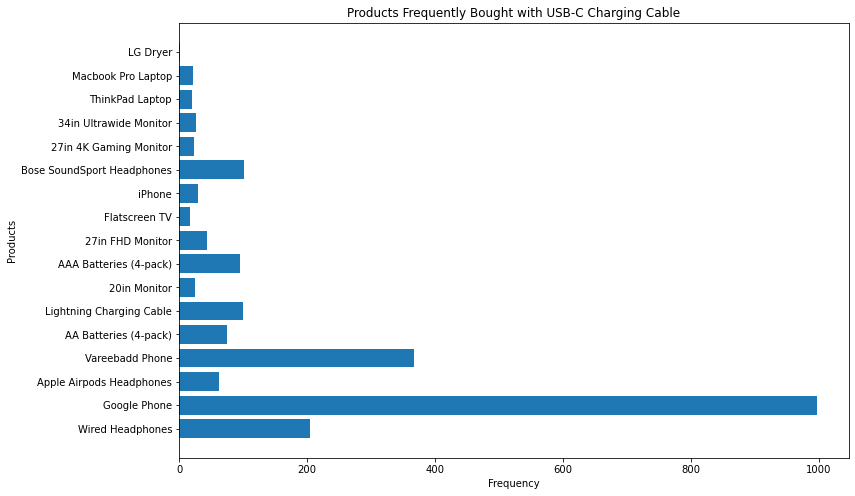

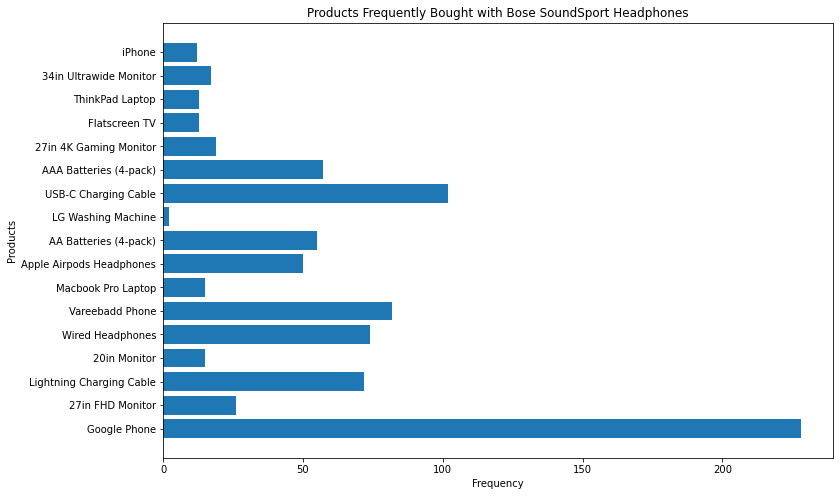

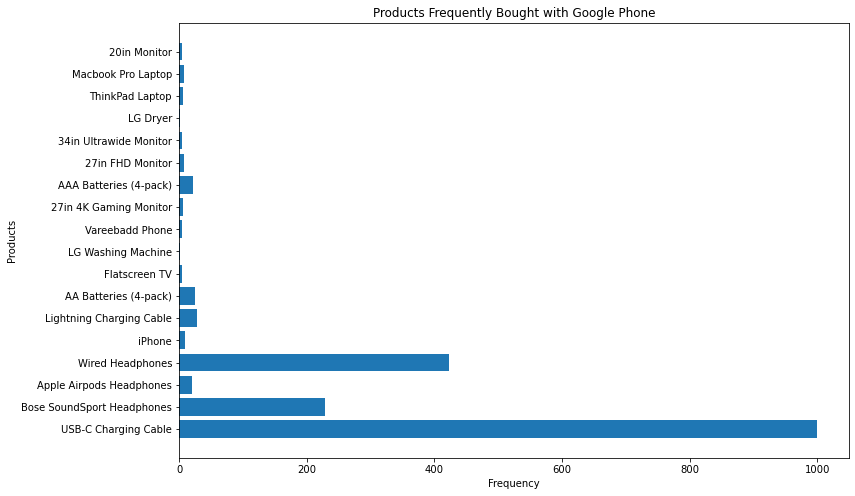

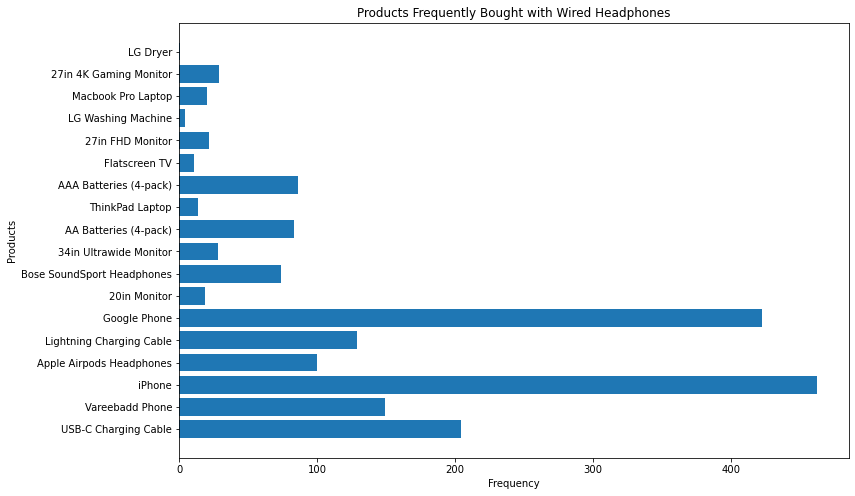

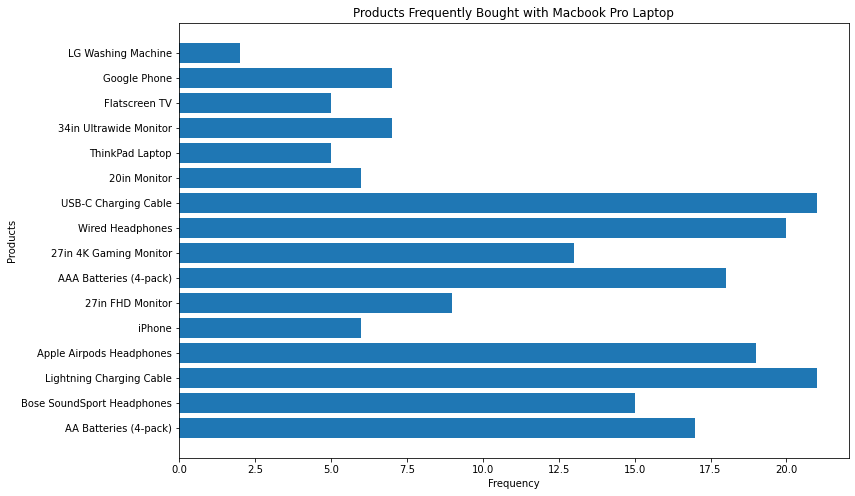

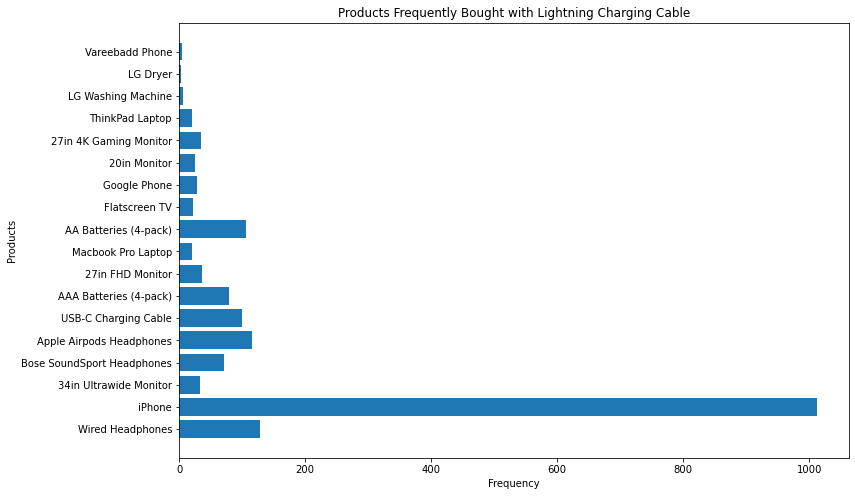

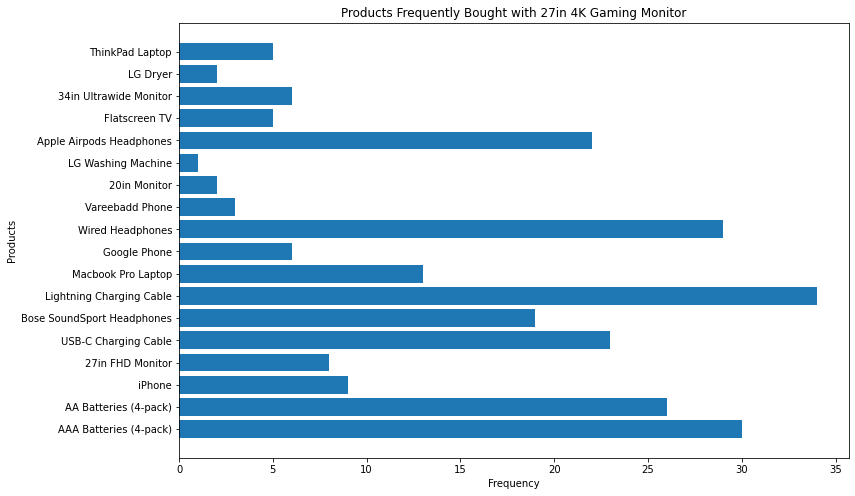

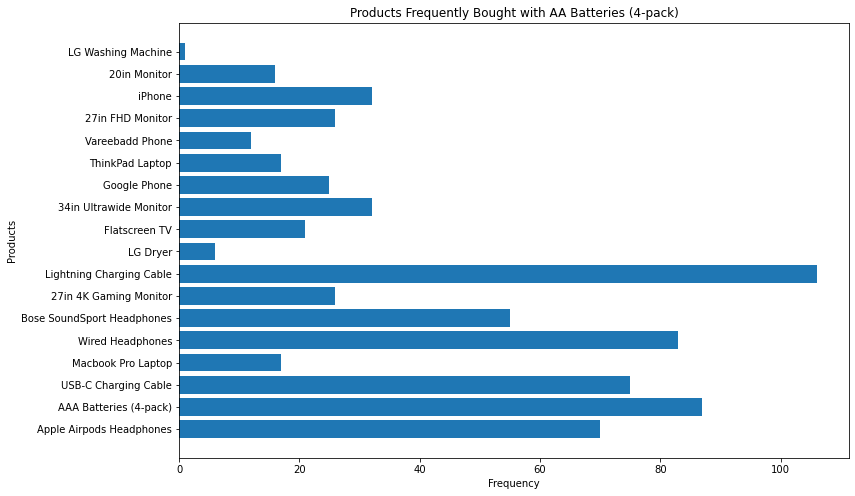

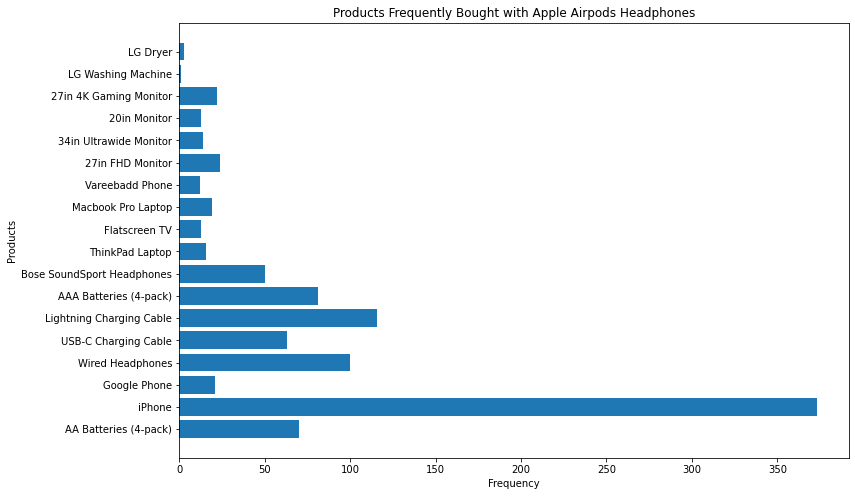

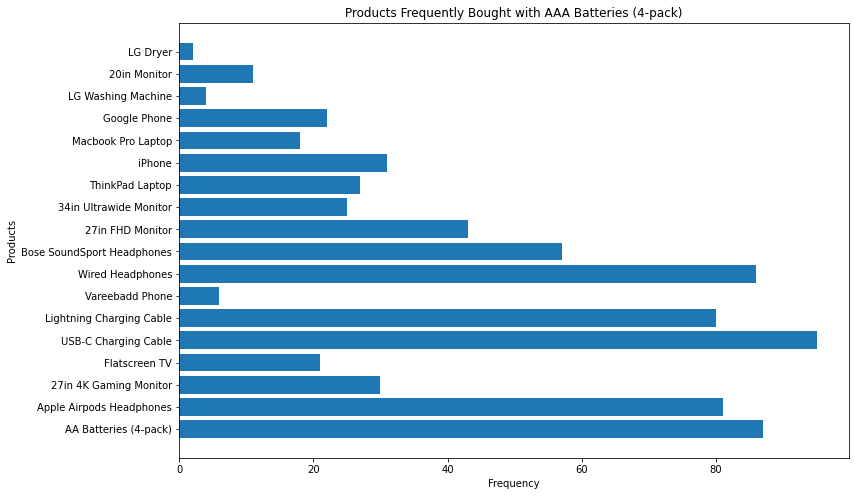

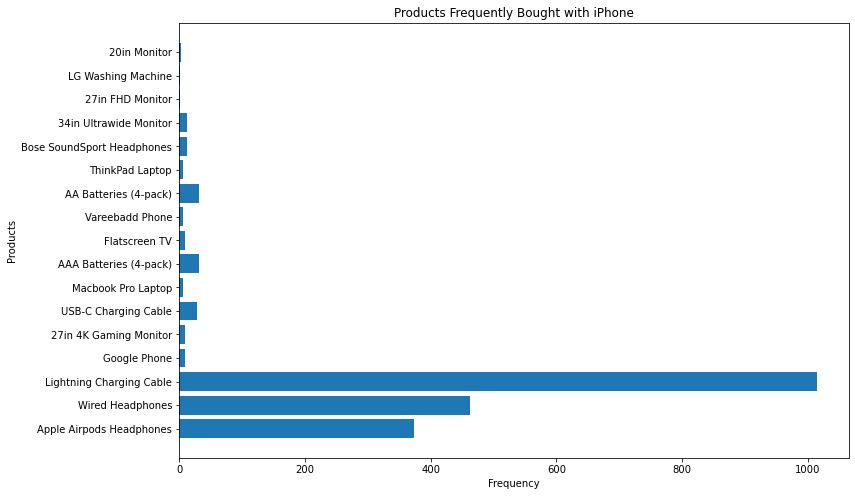

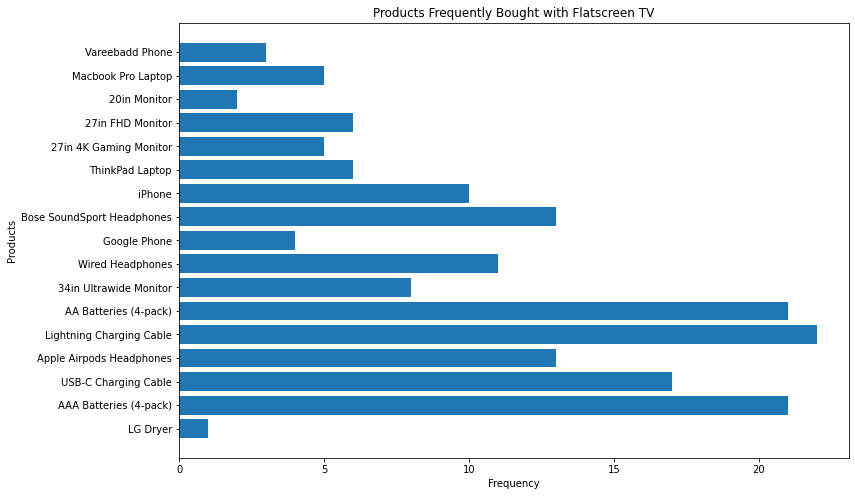

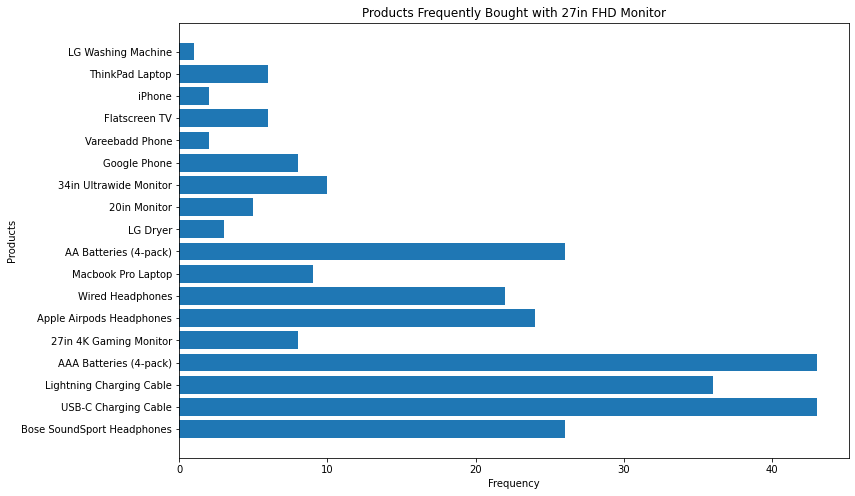

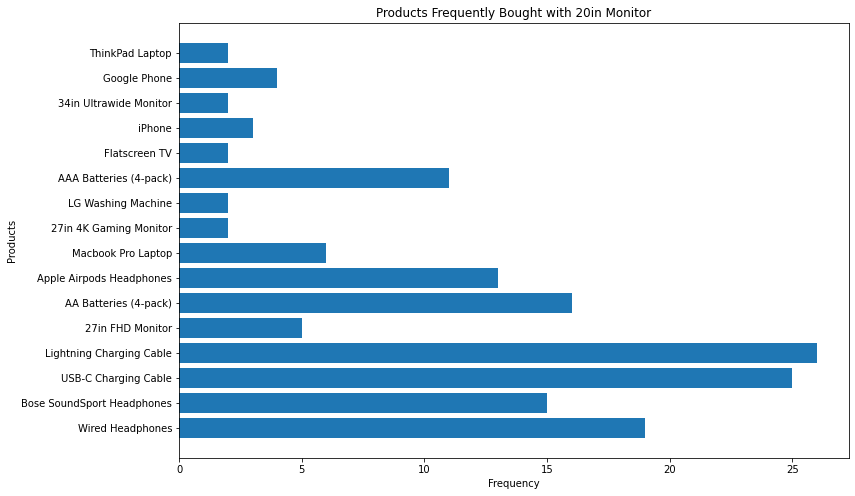

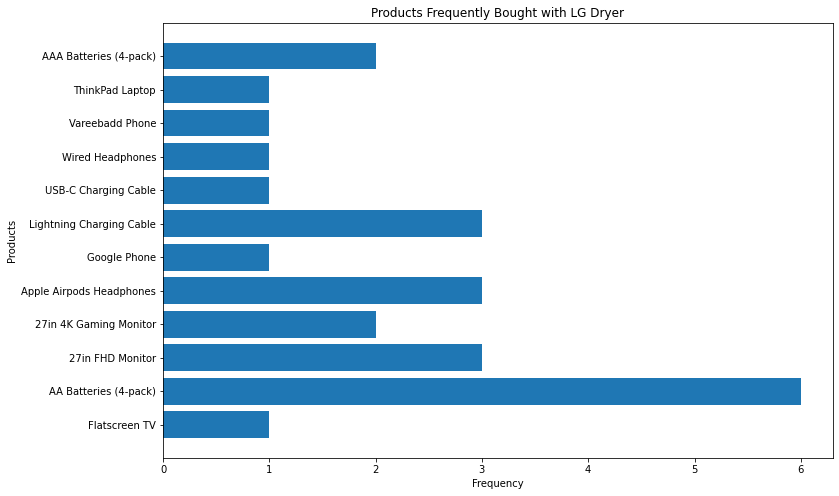

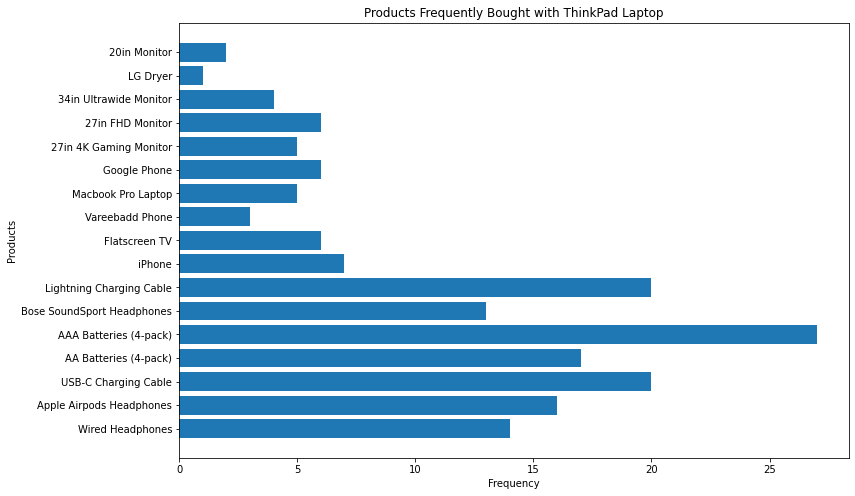

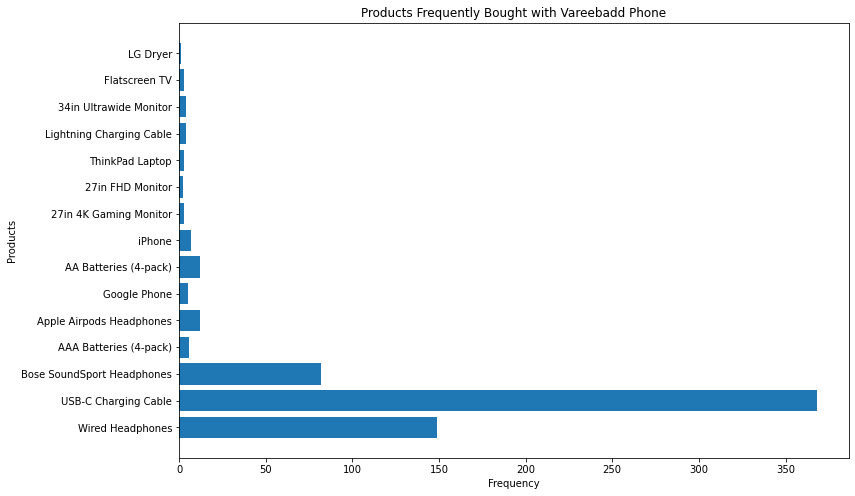

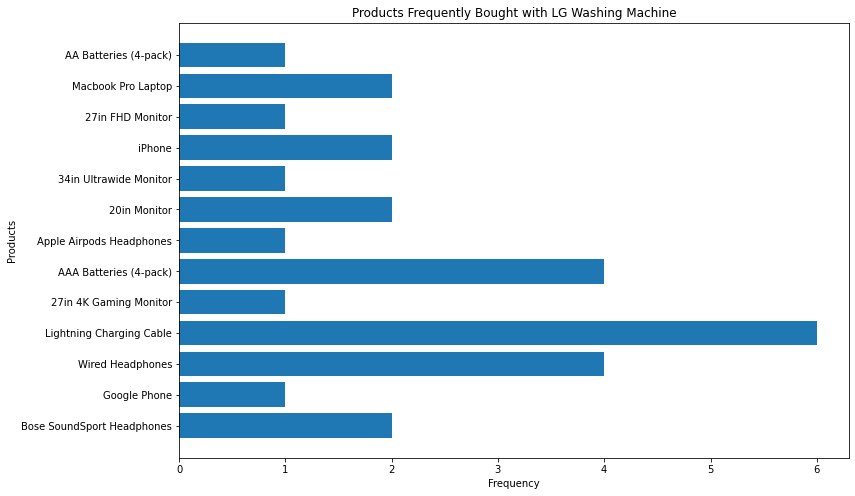

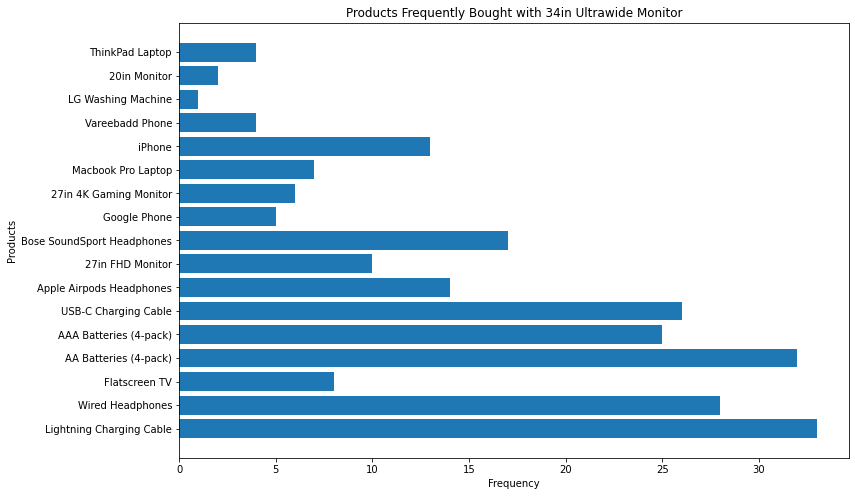

In [51]:
for prod in freq_bought:
    plt.figure(figsize=(12, 8))
    plt.barh(list(freq_bought[prod].keys()),list(freq_bought[prod].values()))
    plt.xlabel('Frequency')
    plt.ylabel('Products')
    plt.title(f'Products Frequently Bought with {prod}')
    plt.show()